In [285]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn import datasets, metrics, grid_search, cross_validation
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
%matplotlib inline

In [286]:
data = pd.read_csv('../Final Project/DataScienceFinalProjectValues1YrCSV.csv')

In [287]:
data.head()

,Calender_Year_Year End,Name,Ticker,Primary_Prospectus_Benchmark,#_of_Holdings,Turnover_Ratio,Total_Market_Value,P_B,P_C,P_E,...,Equity_Style_Factor_P_S,Equity_Style_Factor_P_C,Equity_Style_Factor_Div_Yld,Equity_Style_Factor_LT_Earn_Growth,Equity_Style_Factor_Hist_Earn_Growth,Equity_Style_Factor_BV_Growth,Equity_Style_Factor_Sales_Growth,Equity_Style_Factor_CF_Growth,1Yr_Return,1Yr_Return_BM
0,2005,STAAR International,SITIX,MSCI EAFE NR USD,17,16,4758135,2.61,8.51,15.00,...,1.01,5.10,2.72,12.59,18.78,-7.83,6.66,-14.86,21.38,26.34
1,2005,Hartford Schroders International Stk I,SCIEX,MSCI EAFE NR USD,50,126,7173207,3.76,11.13,16.41,...,1.46,11.52,3.81,13.09,22.45,3.97,1.73,1.48,24.46,26.34
2,2005,Sextant International,SSIFX,MSCI EAFE NR USD,59,5,7208690,2.48,9.48,18.89,...,2.42,7.55,1.55,10.45,18.01,7.51,7.00,16.96,22.02,26.34
3,2005,Sit International Growth,SNGRX,MSCI EAFE NR USD,93,28,31827776,1.48,5.23,21.07,...,1.41,10.62,1.79,13.20,22.26,6.14,5.39,10.78,18.19,26.34
4,2005,Cambiar International Equity Inv,CAMIX,MSCI EAFE NR USD,40,63,32780427,2.64,7.72,13.85,...,0.92,5.89,2.20,10.73,12.12,3.26,-4.04,5.15,29.04,26.34


In [288]:
data.shape

(9271, 27)

In [289]:
data.dtypes

Calender_Year_Year End                    int64
Name                                     object
Ticker                                   object
Primary_Prospectus_Benchmark             object
#_of_Holdings                             int64
Turnover_Ratio                            int64
Total_Market_Value                        int64
P_B                                     float64
P_C                                     float64
P_E                                     float64
P_S                                     float64
Debt_to_Capital                         float64
Net_Margin                              float64
ROA                                     float64
ROE                                     float64
Equity_Style_Factor_P_E                 float64
Equity_Style_Factor_P_B                 float64
Equity_Style_Factor_P_S                 float64
Equity_Style_Factor_P_C                 float64
Equity_Style_Factor_Div_Yld             float64
Equity_Style_Factor_LT_Earn_Growth      

In [290]:
#Count number of Nan
data.isnull().sum()

Calender_Year_Year End                    0
Name                                      0
Ticker                                    0
Primary_Prospectus_Benchmark              0
#_of_Holdings                             0
Turnover_Ratio                            0
Total_Market_Value                        0
P_B                                      52
P_C                                     321
P_E                                     130
P_S                                      59
Debt_to_Capital                         207
Net_Margin                               64
ROA                                      52
ROE                                      52
Equity_Style_Factor_P_E                  59
Equity_Style_Factor_P_B                  59
Equity_Style_Factor_P_S                  59
Equity_Style_Factor_P_C                  63
Equity_Style_Factor_Div_Yld              67
Equity_Style_Factor_LT_Earn_Growth       60
Equity_Style_Factor_Hist_Earn_Growth     70
Equity_Style_Factor_BV_Growth   

In [291]:
cleandata =  data

In [292]:
cleandata['P_B'] = cleandata.groupby(['Primary_Prospectus_Benchmark']).P_B.transform(lambda x: x.fillna(x.mean()))
cleandata['P_C'] = cleandata.groupby(['Primary_Prospectus_Benchmark']).P_C.transform(lambda x: x.fillna(x.mean()))
cleandata['P_E'] = cleandata.groupby(['Primary_Prospectus_Benchmark']).P_E.transform(lambda x: x.fillna(x.mean()))
cleandata['P_S'] = cleandata.groupby(['Primary_Prospectus_Benchmark']).P_S.transform(lambda x: x.fillna(x.mean()))
cleandata['Debt_to_Capital'] = cleandata.groupby(['Primary_Prospectus_Benchmark']).Debt_to_Capital.transform(lambda x: x.fillna(x.mean()))
cleandata['Net_Margin'] = cleandata.groupby(['Primary_Prospectus_Benchmark']).Net_Margin.transform(lambda x: x.fillna(x.mean()))
cleandata['ROA'] = cleandata.groupby(['Primary_Prospectus_Benchmark']).ROA.transform(lambda x: x.fillna(x.mean()))
cleandata['ROE'] = cleandata.groupby(['Primary_Prospectus_Benchmark']).ROE.transform(lambda x: x.fillna(x.mean()))
cleandata['Equity_Style_Factor_P_E'] = cleandata.groupby(['Primary_Prospectus_Benchmark']).Equity_Style_Factor_P_E.transform(lambda x: x.fillna(x.mean()))
cleandata['Equity_Style_Factor_P_B'] = cleandata.groupby(['Primary_Prospectus_Benchmark']).Equity_Style_Factor_P_B.transform(lambda x: x.fillna(x.mean()))
cleandata['Equity_Style_Factor_P_S'] = cleandata.groupby(['Primary_Prospectus_Benchmark']).Equity_Style_Factor_P_S.transform(lambda x: x.fillna(x.mean()))
cleandata['Equity_Style_Factor_P_C'] = cleandata.groupby(['Primary_Prospectus_Benchmark']).Equity_Style_Factor_P_C.transform(lambda x: x.fillna(x.mean()))
cleandata['Equity_Style_Factor_Div_Yld'] = cleandata.groupby(['Primary_Prospectus_Benchmark']).Equity_Style_Factor_Div_Yld.transform(lambda x: x.fillna(x.mean()))
cleandata['Equity_Style_Factor_LT_Earn_Growth'] = cleandata.groupby(['Primary_Prospectus_Benchmark']).Equity_Style_Factor_LT_Earn_Growth.transform(lambda x: x.fillna(x.mean()))
cleandata['Equity_Style_Factor_Hist_Earn_Growth'] = cleandata.groupby(['Primary_Prospectus_Benchmark']).Equity_Style_Factor_Hist_Earn_Growth.transform(lambda x: x.fillna(x.mean()))
cleandata['Equity_Style_Factor_BV_Growth'] = cleandata.groupby(['Primary_Prospectus_Benchmark']).Equity_Style_Factor_BV_Growth.transform(lambda x: x.fillna(x.mean()))
cleandata['Equity_Style_Factor_Sales_Growth'] = cleandata.groupby(['Primary_Prospectus_Benchmark']).Equity_Style_Factor_Sales_Growth.transform(lambda x: x.fillna(x.mean()))
cleandata['Equity_Style_Factor_CF_Growth'] = cleandata.groupby(['Primary_Prospectus_Benchmark']).Equity_Style_Factor_CF_Growth.transform(lambda x: x.fillna(x.mean()))

In [293]:
data.isnull().sum()

Calender_Year_Year End                  0
Name                                    0
Ticker                                  0
Primary_Prospectus_Benchmark            0
#_of_Holdings                           0
Turnover_Ratio                          0
Total_Market_Value                      0
P_B                                     0
P_C                                     0
P_E                                     0
P_S                                     0
Debt_to_Capital                         0
Net_Margin                              0
ROA                                     0
ROE                                     0
Equity_Style_Factor_P_E                 0
Equity_Style_Factor_P_B                 0
Equity_Style_Factor_P_S                 0
Equity_Style_Factor_P_C                 0
Equity_Style_Factor_Div_Yld             0
Equity_Style_Factor_LT_Earn_Growth      0
Equity_Style_Factor_Hist_Earn_Growth    0
Equity_Style_Factor_BV_Growth           0
Equity_Style_Factor_Sales_Growth  

In [294]:
cleandata.shape

(9271, 27)

In [295]:
#new columns, return 1 if outperform BM, return 0 if not
cleandata['Beat_BM_1Yr'] = np.where(cleandata['1Yr_Return']> cleandata['1Yr_Return_BM'], 1, 0)

In [296]:
cleandata.head()

,Calender_Year_Year End,Name,Ticker,Primary_Prospectus_Benchmark,#_of_Holdings,Turnover_Ratio,Total_Market_Value,P_B,P_C,P_E,...,Equity_Style_Factor_P_C,Equity_Style_Factor_Div_Yld,Equity_Style_Factor_LT_Earn_Growth,Equity_Style_Factor_Hist_Earn_Growth,Equity_Style_Factor_BV_Growth,Equity_Style_Factor_Sales_Growth,Equity_Style_Factor_CF_Growth,1Yr_Return,1Yr_Return_BM,Beat_BM_1Yr
0,2005,STAAR International,SITIX,MSCI EAFE NR USD,17,16,4758135,2.61,8.51,15.00,...,5.10,2.72,12.59,18.78,-7.83,6.66,-14.86,21.38,26.34,0
1,2005,Hartford Schroders International Stk I,SCIEX,MSCI EAFE NR USD,50,126,7173207,3.76,11.13,16.41,...,11.52,3.81,13.09,22.45,3.97,1.73,1.48,24.46,26.34,0
2,2005,Sextant International,SSIFX,MSCI EAFE NR USD,59,5,7208690,2.48,9.48,18.89,...,7.55,1.55,10.45,18.01,7.51,7.00,16.96,22.02,26.34,0
3,2005,Sit International Growth,SNGRX,MSCI EAFE NR USD,93,28,31827776,1.48,5.23,21.07,...,10.62,1.79,13.20,22.26,6.14,5.39,10.78,18.19,26.34,0
4,2005,Cambiar International Equity Inv,CAMIX,MSCI EAFE NR USD,40,63,32780427,2.64,7.72,13.85,...,5.89,2.20,10.73,12.12,3.26,-4.04,5.15,29.04,26.34,1


In [297]:
#new columns, returns degree of outperformance or underperformance
cleandata['Perf_vs_BM_1Yr'] = cleandata['1Yr_Return'] - cleandata['1Yr_Return_BM']

In [298]:
cleandata.head()

,Calender_Year_Year End,Name,Ticker,Primary_Prospectus_Benchmark,#_of_Holdings,Turnover_Ratio,Total_Market_Value,P_B,P_C,P_E,...,Equity_Style_Factor_Div_Yld,Equity_Style_Factor_LT_Earn_Growth,Equity_Style_Factor_Hist_Earn_Growth,Equity_Style_Factor_BV_Growth,Equity_Style_Factor_Sales_Growth,Equity_Style_Factor_CF_Growth,1Yr_Return,1Yr_Return_BM,Beat_BM_1Yr,Perf_vs_BM_1Yr
0,2005,STAAR International,SITIX,MSCI EAFE NR USD,17,16,4758135,2.61,8.51,15.00,...,2.72,12.59,18.78,-7.83,6.66,-14.86,21.38,26.34,0,-4.96
1,2005,Hartford Schroders International Stk I,SCIEX,MSCI EAFE NR USD,50,126,7173207,3.76,11.13,16.41,...,3.81,13.09,22.45,3.97,1.73,1.48,24.46,26.34,0,-1.88
2,2005,Sextant International,SSIFX,MSCI EAFE NR USD,59,5,7208690,2.48,9.48,18.89,...,1.55,10.45,18.01,7.51,7.00,16.96,22.02,26.34,0,-4.32
3,2005,Sit International Growth,SNGRX,MSCI EAFE NR USD,93,28,31827776,1.48,5.23,21.07,...,1.79,13.20,22.26,6.14,5.39,10.78,18.19,26.34,0,-8.15
4,2005,Cambiar International Equity Inv,CAMIX,MSCI EAFE NR USD,40,63,32780427,2.64,7.72,13.85,...,2.20,10.73,12.12,3.26,-4.04,5.15,29.04,26.34,1,2.70


In [299]:
cleandata = cleandata.join(pd.get_dummies(cleandata['Primary_Prospectus_Benchmark']))

In [300]:
cleandata.head()

,Calender_Year_Year End,Name,Ticker,Primary_Prospectus_Benchmark,#_of_Holdings,Turnover_Ratio,Total_Market_Value,P_B,P_C,P_E,...,Equity_Style_Factor_Sales_Growth,Equity_Style_Factor_CF_Growth,1Yr_Return,1Yr_Return_BM,Beat_BM_1Yr,Perf_vs_BM_1Yr,MSCI EAFE NR USD,MSCI EM NR USD,Russell 2000 TR USD,S&P 500 TR USD
0,2005,STAAR International,SITIX,MSCI EAFE NR USD,17,16,4758135,2.61,8.51,15.00,...,6.66,-14.86,21.38,26.34,0,-4.96,1,0,0,0
1,2005,Hartford Schroders International Stk I,SCIEX,MSCI EAFE NR USD,50,126,7173207,3.76,11.13,16.41,...,1.73,1.48,24.46,26.34,0,-1.88,1,0,0,0
2,2005,Sextant International,SSIFX,MSCI EAFE NR USD,59,5,7208690,2.48,9.48,18.89,...,7.00,16.96,22.02,26.34,0,-4.32,1,0,0,0
3,2005,Sit International Growth,SNGRX,MSCI EAFE NR USD,93,28,31827776,1.48,5.23,21.07,...,5.39,10.78,18.19,26.34,0,-8.15,1,0,0,0
4,2005,Cambiar International Equity Inv,CAMIX,MSCI EAFE NR USD,40,63,32780427,2.64,7.72,13.85,...,-4.04,5.15,29.04,26.34,1,2.70,1,0,0,0


In [301]:
cleandata.describe()

,Calender_Year_Year End,#_of_Holdings,Turnover_Ratio,Total_Market_Value,P_B,P_C,P_E,P_S,Debt_to_Capital,Net_Margin,...,Equity_Style_Factor_Sales_Growth,Equity_Style_Factor_CF_Growth,1Yr_Return,1Yr_Return_BM,Beat_BM_1Yr,Perf_vs_BM_1Yr,MSCI EAFE NR USD,MSCI EM NR USD,Russell 2000 TR USD,S&P 500 TR USD
count,9271.000000,9271.000000,9271.000000,9.271000e+03,9271.000000,9271.000000,9271.000000,9271.000000,9271.000000,9271.000000,...,9271.000000,9271.000000,9271.000000,9271.000000,9271.000000,9271.000000,9271.000000,9271.000000,9271.000000,9271.000000
mean,2010.177111,215.162550,78.349585,1.919108e+09,2.395142,10.175625,16.840132,1.487014,32.431430,11.985742,...,2.875557,5.814945,8.137690,8.985077,0.392191,-0.847388,0.103980,0.048646,0.135368,0.712005
std,3.114139,378.033881,123.755929,8.277314e+09,0.837033,3.083662,4.524226,0.907717,7.749081,4.251060,...,11.659311,15.479938,20.653768,18.938981,0.488265,9.521042,0.305251,0.215139,0.342135,0.452853
min,2005.000000,11.000000,0.000000,8.400000e+01,0.220000,0.000000,1.470000,0.100000,0.000000,-16.810000,...,-90.570000,-92.550000,-68.120000,-53.330000,0.000000,-83.800000,0.000000,0.000000,0.000000,0.000000
25%,2008.000000,50.000000,22.000000,6.766000e+04,1.830000,8.130000,14.185000,1.030000,28.650000,9.820000,...,0.130000,1.425000,-0.480000,1.380000,0.000000,-4.665000,0.000000,0.000000,0.000000,0.000000
50%,2010.000000,87.000000,46.000000,1.566853e+08,2.260000,10.080000,16.780000,1.330000,33.180000,12.460000,...,5.070000,6.810000,10.290000,13.690000,0.000000,-0.910000,0.000000,0.000000,0.000000,1.000000
75%,2013.000000,189.000000,89.000000,9.364643e+08,2.810000,11.645000,18.905000,1.680000,36.330000,14.160000,...,9.020000,11.815000,19.280000,17.320000,1.000000,2.420000,0.000000,0.000000,0.000000,1.000000
max,2015.000000,4058.000000,1947.000000,1.934530e+11,8.900000,28.900000,46.530000,13.440000,66.420000,51.270000,...,65.200000,360.560000,122.280000,78.510000,1.000000,95.820000,1.000000,1.000000,1.000000,1.000000


In [302]:
cleandata['MSCI EAFE NR USD'].sum()

964

In [303]:
cleandata['MSCI EM NR USD'].sum()

451

In [304]:
cleandata['Russell 2000 TR USD'].sum()

1255

In [305]:
cleandata['S&P 500 TR USD'].sum()

6601

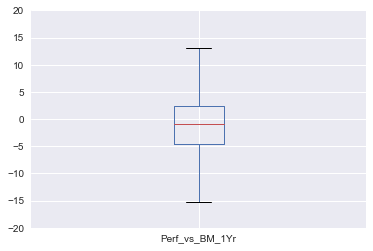

In [306]:
cleandata['Perf_vs_BM_1Yr'].plot(kind='box',ylim=(-20,20))

In [307]:
data.isnull().sum()

Calender_Year_Year End                  0
Name                                    0
Ticker                                  0
Primary_Prospectus_Benchmark            0
#_of_Holdings                           0
Turnover_Ratio                          0
Total_Market_Value                      0
P_B                                     0
P_C                                     0
P_E                                     0
P_S                                     0
Debt_to_Capital                         0
Net_Margin                              0
ROA                                     0
ROE                                     0
Equity_Style_Factor_P_E                 0
Equity_Style_Factor_P_B                 0
Equity_Style_Factor_P_S                 0
Equity_Style_Factor_P_C                 0
Equity_Style_Factor_Div_Yld             0
Equity_Style_Factor_LT_Earn_Growth      0
Equity_Style_Factor_Hist_Earn_Growth    0
Equity_Style_Factor_BV_Growth           0
Equity_Style_Factor_Sales_Growth  

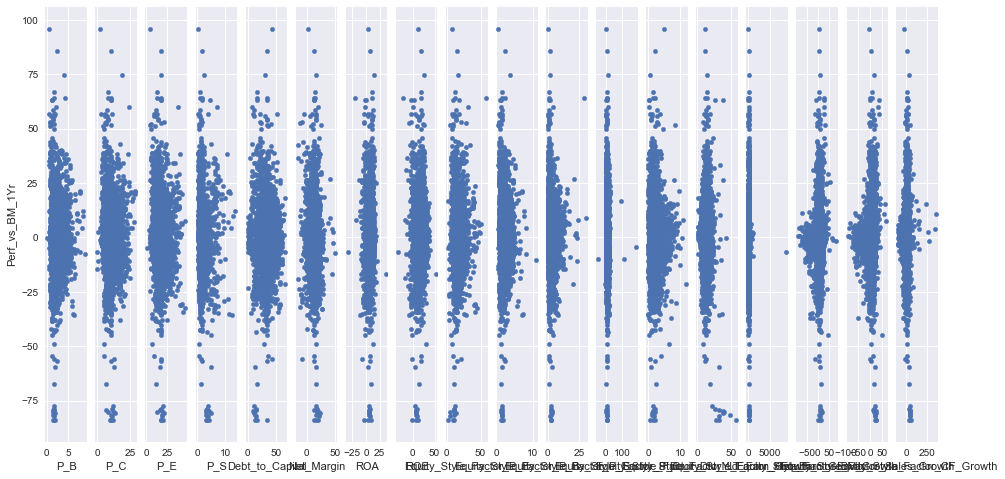

In [308]:
fig, axs = plt.subplots(1, 18, sharey=True)
cleandata.plot(kind='scatter', x='P_B', y='Perf_vs_BM_1Yr', ax=axs[0], figsize=(16, 8))
cleandata.plot(kind='scatter', x='P_C', y='Perf_vs_BM_1Yr', ax=axs[1])
cleandata.plot(kind='scatter', x='P_E', y='Perf_vs_BM_1Yr', ax=axs[2])
cleandata.plot(kind='scatter', x='P_S', y='Perf_vs_BM_1Yr', ax=axs[3])
cleandata.plot(kind='scatter', x='Debt_to_Capital', y='Perf_vs_BM_1Yr', ax=axs[4])
cleandata.plot(kind='scatter', x='Net_Margin', y='Perf_vs_BM_1Yr', ax=axs[5])
cleandata.plot(kind='scatter', x='ROA', y='Perf_vs_BM_1Yr', ax=axs[6])
cleandata.plot(kind='scatter', x='ROE', y='Perf_vs_BM_1Yr', ax=axs[7])
cleandata.plot(kind='scatter', x='Equity_Style_Factor_P_E', y='Perf_vs_BM_1Yr', ax=axs[8])
cleandata.plot(kind='scatter', x='Equity_Style_Factor_P_B', y='Perf_vs_BM_1Yr', ax=axs[9])
cleandata.plot(kind='scatter', x='Equity_Style_Factor_P_S', y='Perf_vs_BM_1Yr', ax=axs[10])
cleandata.plot(kind='scatter', x='Equity_Style_Factor_P_C', y='Perf_vs_BM_1Yr', ax=axs[11])
cleandata.plot(kind='scatter', x='Equity_Style_Factor_Div_Yld', y='Perf_vs_BM_1Yr', ax=axs[12])
cleandata.plot(kind='scatter', x='Equity_Style_Factor_LT_Earn_Growth', y='Perf_vs_BM_1Yr', ax=axs[13])
cleandata.plot(kind='scatter', x='Equity_Style_Factor_Hist_Earn_Growth', y='Perf_vs_BM_1Yr', ax=axs[14])
cleandata.plot(kind='scatter', x='Equity_Style_Factor_BV_Growth', y='Perf_vs_BM_1Yr', ax=axs[15])
cleandata.plot(kind='scatter', x='Equity_Style_Factor_Sales_Growth', y='Perf_vs_BM_1Yr', ax=axs[16])
cleandata.plot(kind='scatter', x='Equity_Style_Factor_CF_Growth', y='Perf_vs_BM_1Yr', ax=axs[17])

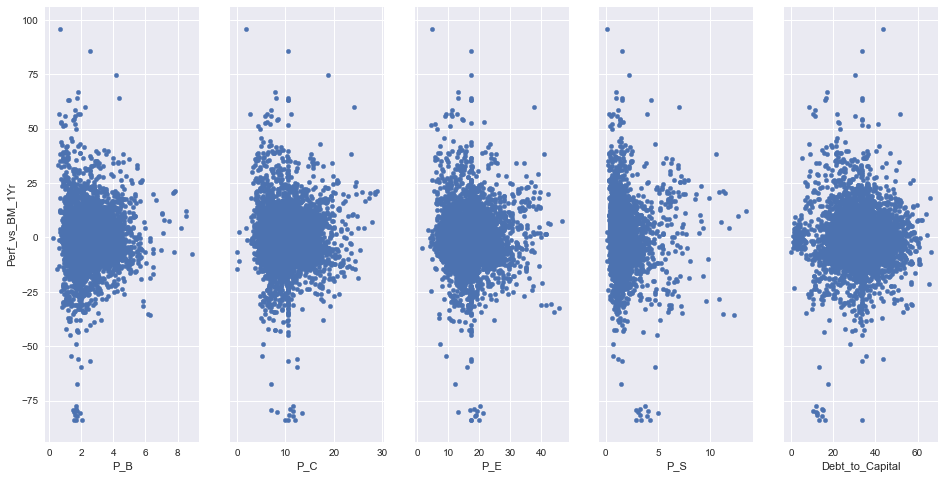

In [309]:
fig, axs = plt.subplots(1, 5, sharey=True)
cleandata.plot(kind='scatter', x='P_B', y='Perf_vs_BM_1Yr', ax=axs[0], figsize=(16, 8))
cleandata.plot(kind='scatter', x='P_C', y='Perf_vs_BM_1Yr', ax=axs[1])
cleandata.plot(kind='scatter', x='P_E', y='Perf_vs_BM_1Yr', ax=axs[2])
cleandata.plot(kind='scatter', x='P_S', y='Perf_vs_BM_1Yr', ax=axs[3])
cleandata.plot(kind='scatter', x='Debt_to_Capital', y='Perf_vs_BM_1Yr', ax=axs[4])

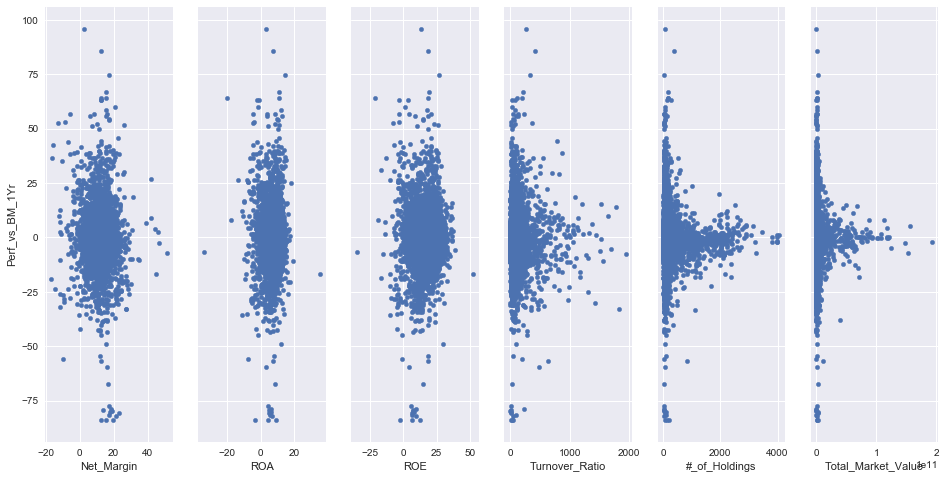

In [310]:
fig, axs = plt.subplots(1, 6, sharey=True)
cleandata.plot(kind='scatter', x='Net_Margin', y='Perf_vs_BM_1Yr', ax=axs[0], figsize=(16, 8))
cleandata.plot(kind='scatter', x='ROA', y='Perf_vs_BM_1Yr', ax=axs[1])
cleandata.plot(kind='scatter', x='ROE', y='Perf_vs_BM_1Yr', ax=axs[2])
cleandata.plot(kind='scatter', x='Turnover_Ratio', y='Perf_vs_BM_1Yr', ax=axs[3])
cleandata.plot(kind='scatter', x='#_of_Holdings', y='Perf_vs_BM_1Yr', ax=axs[4])
cleandata.plot(kind='scatter', x='Total_Market_Value', y='Perf_vs_BM_1Yr', ax=axs[5])


                      P_B       P_C       P_E       P_S  Debt_to_Capital  \
P_B              1.000000  0.783564  0.626861  0.578226        -0.162571   
P_C              0.783564  1.000000  0.752058  0.641284        -0.167139   
P_E              0.626861  0.752058  1.000000  0.604609         0.012334   
P_S              0.578226  0.641284  0.604609  1.000000        -0.115850   
Debt_to_Capital -0.162571 -0.167139  0.012334 -0.115850         1.000000   
Net_Margin       0.221436  0.165779 -0.086612  0.312532        -0.134277   
ROA              0.304551  0.158365 -0.129622 -0.074638        -0.228720   
ROE              0.324809  0.078657 -0.212895 -0.099676        -0.004549   

                 Net_Margin       ROA       ROE  
P_B                0.221436  0.304551  0.324809  
P_C                0.165779  0.158365  0.078657  
P_E               -0.086612 -0.129622 -0.212895  
P_S                0.312532 -0.074638 -0.099676  
Debt_to_Capital   -0.134277 -0.228720 -0.004549  
Net_Margin     

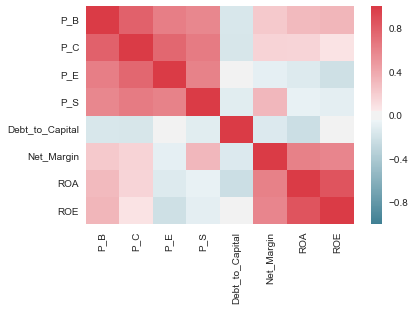

In [311]:
cmap = sns.diverging_palette(220, 10, as_cmap=True)
columns_to_keep = ['P_B', 'P_C', 'P_E', 'P_S','Debt_to_Capital', 'Net_Margin', 'ROA', 'ROE']
correlations = cleandata[columns_to_keep].corr()
print correlations
print sns.heatmap(correlations, cmap=cmap)

          P_B       P_C       P_E       P_S
P_B  1.000000  0.783564  0.626861  0.578226
P_C  0.783564  1.000000  0.752058  0.641284
P_E  0.626861  0.752058  1.000000  0.604609
P_S  0.578226  0.641284  0.604609  1.000000
Axes(0.125,0.125;0.62x0.755)


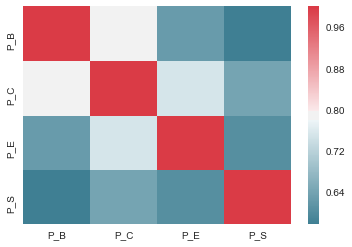

In [312]:
cmap = sns.diverging_palette(220, 10, as_cmap=True)
columns_to_keep = ['P_B', 'P_C', 'P_E', 'P_S']
correlations = cleandata[columns_to_keep].corr()
print correlations
print sns.heatmap(correlations, cmap=cmap)

                 Debt_to_Capital  Net_Margin       ROA       ROE
Debt_to_Capital         1.000000   -0.134277 -0.228720 -0.004549
Net_Margin             -0.134277    1.000000  0.613105  0.593467
ROA                    -0.228720    0.613105  1.000000  0.855188
ROE                    -0.004549    0.593467  0.855188  1.000000
Axes(0.125,0.125;0.62x0.755)


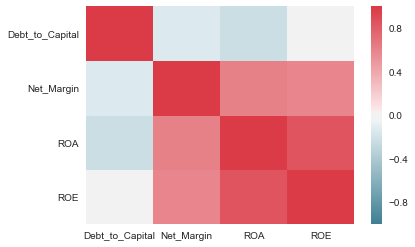

In [175]:
cmap = sns.diverging_palette(220, 10, as_cmap=True)
columns_to_keep = ['Debt_to_Capital', 'Net_Margin', 'ROA', 'ROE']
correlations = cleandata[columns_to_keep].corr()
print correlations
print sns.heatmap(correlations, cmap=cmap)

In [313]:
cleandata.describe()

,Calender_Year_Year End,#_of_Holdings,Turnover_Ratio,Total_Market_Value,P_B,P_C,P_E,P_S,Debt_to_Capital,Net_Margin,...,Equity_Style_Factor_Sales_Growth,Equity_Style_Factor_CF_Growth,1Yr_Return,1Yr_Return_BM,Beat_BM_1Yr,Perf_vs_BM_1Yr,MSCI EAFE NR USD,MSCI EM NR USD,Russell 2000 TR USD,S&P 500 TR USD
count,9271.000000,9271.000000,9271.000000,9.271000e+03,9271.000000,9271.000000,9271.000000,9271.000000,9271.000000,9271.000000,...,9271.000000,9271.000000,9271.000000,9271.000000,9271.000000,9271.000000,9271.000000,9271.000000,9271.000000,9271.000000
mean,2010.177111,215.162550,78.349585,1.919108e+09,2.395142,10.175625,16.840132,1.487014,32.431430,11.985742,...,2.875557,5.814945,8.137690,8.985077,0.392191,-0.847388,0.103980,0.048646,0.135368,0.712005
std,3.114139,378.033881,123.755929,8.277314e+09,0.837033,3.083662,4.524226,0.907717,7.749081,4.251060,...,11.659311,15.479938,20.653768,18.938981,0.488265,9.521042,0.305251,0.215139,0.342135,0.452853
min,2005.000000,11.000000,0.000000,8.400000e+01,0.220000,0.000000,1.470000,0.100000,0.000000,-16.810000,...,-90.570000,-92.550000,-68.120000,-53.330000,0.000000,-83.800000,0.000000,0.000000,0.000000,0.000000
25%,2008.000000,50.000000,22.000000,6.766000e+04,1.830000,8.130000,14.185000,1.030000,28.650000,9.820000,...,0.130000,1.425000,-0.480000,1.380000,0.000000,-4.665000,0.000000,0.000000,0.000000,0.000000
50%,2010.000000,87.000000,46.000000,1.566853e+08,2.260000,10.080000,16.780000,1.330000,33.180000,12.460000,...,5.070000,6.810000,10.290000,13.690000,0.000000,-0.910000,0.000000,0.000000,0.000000,1.000000
75%,2013.000000,189.000000,89.000000,9.364643e+08,2.810000,11.645000,18.905000,1.680000,36.330000,14.160000,...,9.020000,11.815000,19.280000,17.320000,1.000000,2.420000,0.000000,0.000000,0.000000,1.000000
max,2015.000000,4058.000000,1947.000000,1.934530e+11,8.900000,28.900000,46.530000,13.440000,66.420000,51.270000,...,65.200000,360.560000,122.280000,78.510000,1.000000,95.820000,1.000000,1.000000,1.000000,1.000000


# Logistic Regression

In [314]:
lm = LogisticRegression()

lm.fit(cleandata[['P_B', 'P_C', 'P_E', 'P_S','Debt_to_Capital', 'Net_Margin', 'ROA', 'ROE',\
                 '#_of_Holdings', 'Turnover_Ratio', 'Total_Market_Value']], cleandata['Beat_BM_1Yr'])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [315]:
print np.exp(lm.coef_)
print np.exp(lm.intercept_)
print cleandata.Beat_BM_1Yr.mean()

[[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]]
[ 1.]
0.39219070219


In [316]:
feature_set = cleandata[['P_B', 'P_C', 'P_E', 'P_S','Debt_to_Capital', 'Net_Margin', 'ROA', 'ROE',\
                 '#_of_Holdings', 'Turnover_Ratio', 'Total_Market_Value']]
print lm.score(feature_set, cleandata['Beat_BM_1Yr'])

0.60780929781


In [ ]:
#The accuracy of the model with all features (removing one rank) is ~61%.

In [317]:
roc_auc_score(cleandata['Beat_BM_1Yr'], lm.predict(feature_set))

0.5

# Logistic Regression using Grid Search

In [318]:
#Grid Search with Logistic Regression

datafactors = cleandata[['P_B', 'P_C', 'P_E', 'P_S','Debt_to_Capital', 'Net_Margin', 'ROA', 'ROE',\
                 '#_of_Holdings', 'Turnover_Ratio', 'Total_Market_Value']]

sc = StandardScaler()
scaled_feature = sc.fit_transform(datafactors)
gs = grid_search.GridSearchCV(
    estimator=LogisticRegression(),
    param_grid={'C': [i for i in range(1, 10)], 'class_weight': [None, 'auto']},
    cv=cross_validation.KFold(n=len(cleandata), n_folds=10),
    scoring='recall'
)

gs.fit(scaled_feature, cleandata.Beat_BM_1Yr)
print ('Best Scores:',gs.grid_scores_)
print('Best 1Yr Score:', gs.best_score_) 

/Users/michaeltong/anaconda/lib/python2.7/site-packages/sklearn/utils/class_weight.py:65: DeprecationWarning: The class_weight='auto' heuristic is deprecated in 0.17 in favor of a new heuristic class_weight='balanced'. 'auto' will be removed in 0.19
  " 0.19", DeprecationWarning)
/Users/michaeltong/anaconda/lib/python2.7/site-packages/sklearn/utils/class_weight.py:65: DeprecationWarning: The class_weight='auto' heuristic is deprecated in 0.17 in favor of a new heuristic class_weight='balanced'. 'auto' will be removed in 0.19
  " 0.19", DeprecationWarning)
/Users/michaeltong/anaconda/lib/python2.7/site-packages/sklearn/utils/class_weight.py:65: DeprecationWarning: The class_weight='auto' heuristic is deprecated in 0.17 in favor of a new heuristic class_weight='balanced'. 'auto' will be removed in 0.19
  " 0.19", DeprecationWarning)
/Users/michaeltong/anaconda/lib/python2.7/site-packages/sklearn/utils/class_weight.py:65: DeprecationWarning: The class_weight='auto' heuristic is deprecated

('Best Scores:', [mean: 0.05490, std: 0.05333, params: {'C': 1, 'class_weight': None}, mean: 0.44337, std: 0.20435, params: {'C': 1, 'class_weight': 'auto'}, mean: 0.05490, std: 0.05333, params: {'C': 2, 'class_weight': None}, mean: 0.44305, std: 0.20443, params: {'C': 2, 'class_weight': 'auto'}, mean: 0.05490, std: 0.05333, params: {'C': 3, 'class_weight': None}, mean: 0.44305, std: 0.20443, params: {'C': 3, 'class_weight': 'auto'}, mean: 0.05490, std: 0.05333, params: {'C': 4, 'class_weight': None}, mean: 0.44305, std: 0.20443, params: {'C': 4, 'class_weight': 'auto'}, mean: 0.05490, std: 0.05333, params: {'C': 5, 'class_weight': None}, mean: 0.44305, std: 0.20443, params: {'C': 5, 'class_weight': 'auto'}, mean: 0.05490, std: 0.05333, params: {'C': 6, 'class_weight': None}, mean: 0.44305, std: 0.20443, params: {'C': 6, 'class_weight': 'auto'}, mean: 0.05490, std: 0.05333, params: {'C': 7, 'class_weight': None}, mean: 0.44323, std: 0.20425, params: {'C': 7, 'class_weight': 'auto'}, me

/Users/michaeltong/anaconda/lib/python2.7/site-packages/sklearn/utils/class_weight.py:65: DeprecationWarning: The class_weight='auto' heuristic is deprecated in 0.17 in favor of a new heuristic class_weight='balanced'. 'auto' will be removed in 0.19
  " 0.19", DeprecationWarning)


* Estimator with gave highest score

In [319]:
print('Best 1Yr Estimator:', gs.best_estimator_)

('Best 1Yr Estimator:', LogisticRegression(C=1, class_weight='auto', dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))


* 1 Year Performance Results

In [320]:
print('Best 1Yr Score:', gs.best_score_)
print('Best 1Yr Parameter:', gs.best_params_)
zip(['P_B', 'P_C', 'P_E', 'P_S','Debt_to_Capital', 'Net_Margin', 'ROA', 'ROE',\
                 '#_of_Holdings', 'Turnover_Ratio', 'Total_Market_Value'],gs.best_estimator_.coef_[0])

('Best 1Yr Score:', 0.44336893549188344)
('Best 1Yr Parameter:', {'C': 1, 'class_weight': 'auto'})


[('P_B', 0.19451920263400438),
 ('P_C', -0.17003911885830678),
 ('P_E', -0.11746568759999927),
 ('P_S', 0.08725024861647937),
 ('Debt_to_Capital', -0.090847754811215251),
 ('Net_Margin', -0.094138758903025435),
 ('ROA', 0.058389512336949161),
 ('ROE', -0.17465040598403592),
 ('#_of_Holdings', -0.11718090303311464),
 ('Turnover_Ratio', 0.065314883164186127),
 ('Total_Market_Value', 0.023370206150203039)]

In [321]:
print('Best 1Yr Intercept:', gs.best_estimator_.intercept_[0])
print('Best 1Yr Coefficients:', gs.best_estimator_.coef_[0])

('Best 1Yr Intercept:', -0.005639219940212996)
('Best 1Yr Coefficients:', array([ 0.1945192 , -0.17003912, -0.11746569,  0.08725025, -0.09084775,
       -0.09413876,  0.05838951, -0.17465041, -0.1171809 ,  0.06531488,
        0.02337021]))


In [322]:
lm1= LogisticRegression()
features = ['P_B']
lm1.fit(cleandata[features], cleandata['Beat_BM_1Yr'])
cleandata['probabilityPB'] = lm1.predict_proba(cleandata[features]).T[1]

In [323]:
lm1= LogisticRegression()
features = ['P_S']
lm1.fit(cleandata[features], cleandata['Beat_BM_1Yr'])
cleandata['probabilityPS'] = lm1.predict_proba(cleandata[features]).T[1]

In [324]:
lm1= LogisticRegression()
features = ['P_C']
lm1.fit(cleandata[features], cleandata['Beat_BM_1Yr'])
cleandata['probabilityPC'] = lm1.predict_proba(cleandata[features]).T[1]

In [325]:
lm1= LogisticRegression()
features = ['ROE']
lm1.fit(cleandata[features], cleandata['Beat_BM_1Yr'])
cleandata['probabilityROE'] = lm1.predict_proba(cleandata[features]).T[1]

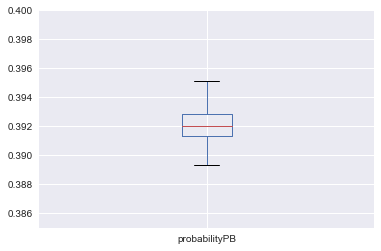

In [326]:
cleandata['probabilityPB'].plot(kind='box',ylim=(0.385,0.400))

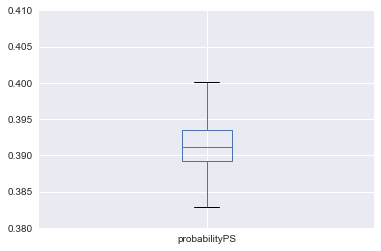

In [327]:
cleandata['probabilityPS'].plot(kind='box',ylim=(0.38,0.41))

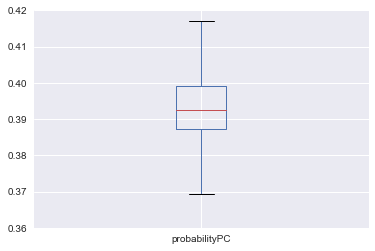

In [328]:
cleandata['probabilityPC'].plot(kind='box',ylim=(0.36,0.420))

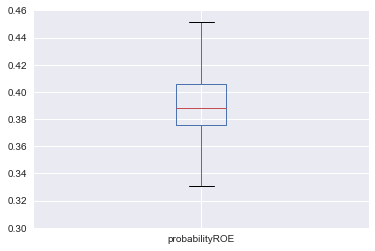

In [329]:
cleandata['probabilityROE'].plot(kind='box',ylim=(0.30,0.46))

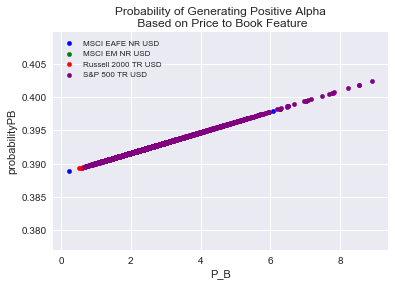

In [330]:
ax = plt.subplot(111)

features = ['MSCI EAFE NR USD', 'MSCI EM NR USD', 'Russell 2000 TR USD', 'S&P 500 TR USD']
colors = ['blue', 'green', 'red', 'purple']
for e, c in enumerate(colors):
    cleandata[cleandata[features[e]] == 1].plot(x='P_B', y='probabilityPB', kind='scatter', color = c, ax=ax)

ax.set(title='Probability of Generating Positive Alpha\n Based on Price to Book Feature')

lines, labels = ax.get_legend_handles_labels()
ax.legend(lines[:2], labels=features, loc='upper left',fontsize=8)

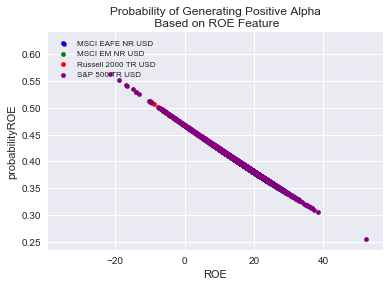

In [194]:
ax = plt.subplot(111)

features = ['MSCI EAFE NR USD', 'MSCI EM NR USD', 'Russell 2000 TR USD', 'S&P 500 TR USD']
colors = ['blue', 'green', 'red', 'purple']
for e, c in enumerate(colors):
    cleandata[cleandata[features[e]] == 1].plot(x='ROE', y='probabilityROE', kind='scatter', color = c, ax=ax)

ax.set(title='Probability of Generating Positive Alpha\n Based on ROE Feature')

lines, labels = ax.get_legend_handles_labels()
ax.legend(lines[:2], labels=features, loc='upper left',fontsize=8)

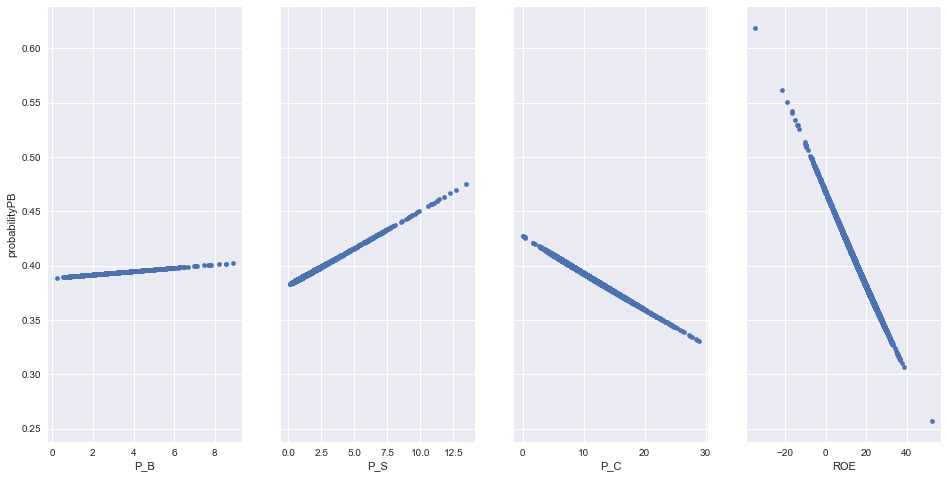

In [331]:
fig, axs = plt.subplots(1,4 , sharey=True)
cleandata.plot(kind='scatter', x='P_B', y='probabilityPB', ax=axs[0], figsize=(16, 8))
cleandata.plot(kind='scatter', x='P_S', y='probabilityPS', ax=axs[1], figsize=(16, 8))
cleandata.plot(kind='scatter', x='P_C', y='probabilityPC', ax=axs[2], figsize=(16, 8))
cleandata.plot(kind='scatter', x='ROE', y='probabilityROE', ax=axs[3], figsize=(16, 8))

# Random Forest

In [332]:
rfdata = cleandata[['P_B', 'P_C', 'P_E', 'P_S','Debt_to_Capital', 'Net_Margin', 'ROA', 'ROE',\
                 '#_of_Holdings', 'Turnover_Ratio', 'Total_Market_Value','Beat_BM_1Yr']]

In [333]:
rfdata.shape

(9271, 12)

In [334]:
rfdata.dtypes

P_B                   float64
P_C                   float64
P_E                   float64
P_S                   float64
Debt_to_Capital       float64
Net_Margin            float64
ROA                   float64
ROE                   float64
#_of_Holdings           int64
Turnover_Ratio          int64
Total_Market_Value      int64
Beat_BM_1Yr             int64
dtype: object

In [335]:
rfdata.head()

,P_B,P_C,P_E,P_S,Debt_to_Capital,Net_Margin,ROA,ROE,#_of_Holdings,Turnover_Ratio,Total_Market_Value,Beat_BM_1Yr
0,2.61,8.51,15.00,1.11,3.98,12.48,7.30,18.06,17,16,4758135,0
1,3.76,11.13,16.41,1.50,2.75,11.94,6.51,17.62,50,126,7173207,0
2,2.48,9.48,18.89,1.68,22.32,12.47,8.39,17.74,59,5,7208690,0
3,1.48,5.23,21.07,0.30,7.24,11.00,7.46,17.58,93,28,31827776,0
4,2.64,7.72,13.85,0.98,7.01,7.82,5.19,16.86,40,63,32780427,1


In [336]:
#split data into train and test set
rfdata['train'] = np.random.uniform(0, 1, len(rfdata)) <= .75

/Users/michaeltong/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [337]:
train, test = rfdata[rfdata['train']==True], rfdata[rfdata['train']==False]

In [338]:
rfdata.head()

,P_B,P_C,P_E,P_S,Debt_to_Capital,Net_Margin,ROA,ROE,#_of_Holdings,Turnover_Ratio,Total_Market_Value,Beat_BM_1Yr,train
0,2.61,8.51,15.00,1.11,3.98,12.48,7.30,18.06,17,16,4758135,0,True
1,3.76,11.13,16.41,1.50,2.75,11.94,6.51,17.62,50,126,7173207,0,False
2,2.48,9.48,18.89,1.68,22.32,12.47,8.39,17.74,59,5,7208690,0,True
3,1.48,5.23,21.07,0.30,7.24,11.00,7.46,17.58,93,28,31827776,0,False
4,2.64,7.72,13.85,0.98,7.01,7.82,5.19,16.86,40,63,32780427,1,True


In [339]:
print('Number of observations in the training data:', len(train))
print('Number of observations in the test data:',len(test))

('Number of observations in the training data:', 6938)
('Number of observations in the test data:', 2333)


In [340]:
features1 = rfdata.columns[:11]
features1

Index([u'P_B', u'P_C', u'P_E', u'P_S', u'Debt_to_Capital', u'Net_Margin',
       u'ROA', u'ROE', u'#_of_Holdings', u'Turnover_Ratio',
       u'Total_Market_Value'],
      dtype='object')

In [341]:
clf = RandomForestClassifier(n_jobs=2)

clf.fit(train[features1], train.Beat_BM_1Yr)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=2, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [342]:
scoreclf = clf.score(train[features1], train.Beat_BM_1Yr)
print scoreclf

scoreclfT = clf.score(test[features1], test.Beat_BM_1Yr)
print scoreclfT

0.979821274142
0.666523789113


In [343]:
clf.predict(test[features1])

array([0, 0, 0, ..., 0, 0, 0])

In [344]:
clf.predict_proba(test[features1])[0:10]

array([[ 0.5,  0.5],
       [ 0.6,  0.4],
       [ 0.9,  0.1],
       [ 0.3,  0.7],
       [ 0.5,  0.5],
       [ 0.7,  0.3],
       [ 0.9,  0.1],
       [ 0.9,  0.1],
       [ 0.4,  0.6],
       [ 0.6,  0.4]])

In [345]:
list(zip(train[features1], clf.feature_importances_))

[('P_B', 0.093918334077436633),
 ('P_C', 0.085567189474333782),
 ('P_E', 0.086738949493318313),
 ('P_S', 0.082550117463140366),
 ('Debt_to_Capital', 0.097537679714685327),
 ('Net_Margin', 0.086442589068587219),
 ('ROA', 0.089764837724598506),
 ('ROE', 0.08778701703038902),
 ('#_of_Holdings', 0.096783308642071103),
 ('Turnover_Ratio', 0.087159529474041972),
 ('Total_Market_Value', 0.10575044783739777)]

In [346]:
factors1 = train[features1].columns

features_clf = pd.DataFrame({'Features': features1, 'Importance Score': clf.feature_importances_})
features_clf.sort_values('Importance Score', inplace=True, ascending=False)

features_clf

,Features,Importance Score
10,Total_Market_Value,0.105750
4,Debt_to_Capital,0.097538
8,#_of_Holdings,0.096783
0,P_B,0.093918
6,ROA,0.089765
7,ROE,0.087787
9,Turnover_Ratio,0.087160
2,P_E,0.086739
5,Net_Margin,0.086443
1,P_C,0.085567


In [347]:
lm1= LogisticRegression()
features = ['Total_Market_Value']
lm1.fit(cleandata[features], cleandata['Beat_BM_1Yr'])
cleandata['probabilityMV'] = lm1.predict_proba(cleandata[features]).T[1]

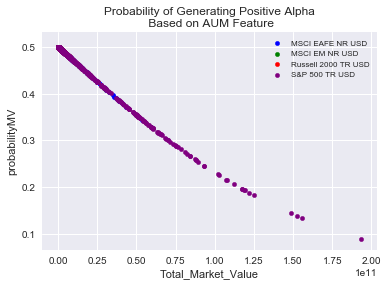

In [348]:
ax = plt.subplot(111)

features = ['MSCI EAFE NR USD', 'MSCI EM NR USD', 'Russell 2000 TR USD', 'S&P 500 TR USD']
colors = ['blue', 'green', 'red', 'purple']
for e, c in enumerate(colors):
    cleandata[cleandata[features[e]] == 1].plot(x='Total_Market_Value', y='probabilityMV', kind='scatter', color = c, ax=ax)

ax.set(title='Probability of Generating Positive Alpha\n Based on AUM Feature')

lines, labels = ax.get_legend_handles_labels()
ax.legend(lines[:2], labels=features, loc='upper right',fontsize=8)